In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, model_selection

Number of Instances:
442

Number of Attributes:
First 10 columns are numeric predictive values

Target:
Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

In [2]:
# load the training dataset

# df = pd.read_csv('diabetes.txt', sep='\t')
# print(df.head())

In [3]:
#  Get data as dataframe
X,y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Add the target values to the table

In [4]:
# # Merge X and y data for analysis
df=X.merge(y,left_index=True, right_index=True)
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


We will do some analysis with the numeric features. All the features have been normalized even the sex. 0.050680 and -0.044642 for each sex. No info on which is female or male. 

In [5]:
numeric_features = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5','s6']
df[numeric_features + ['target']].describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


#### Distribution of target values

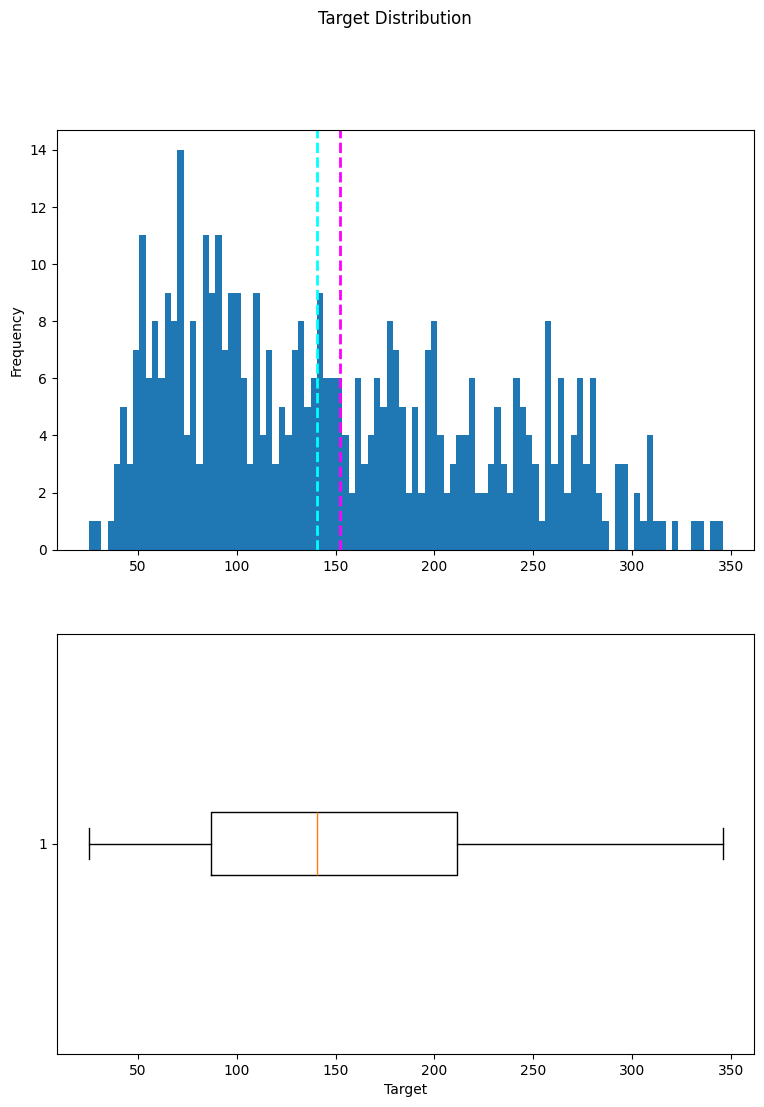

In [6]:
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = df['target']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Target')

# Add a title to the Figure
fig.suptitle('Target Distribution')

# Show the figure
fig.show()

This creates a visual representation of each of the numeric values.

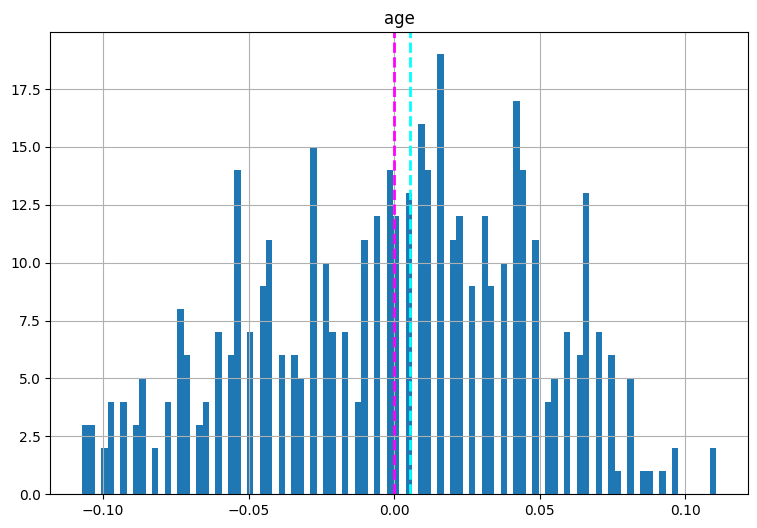

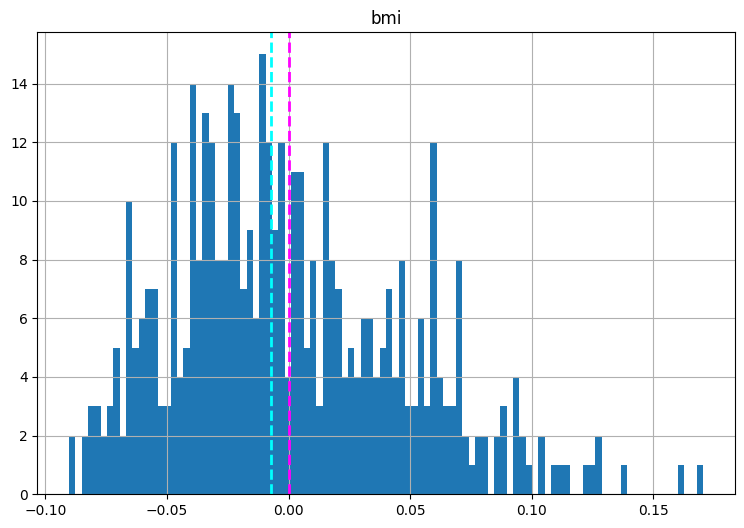

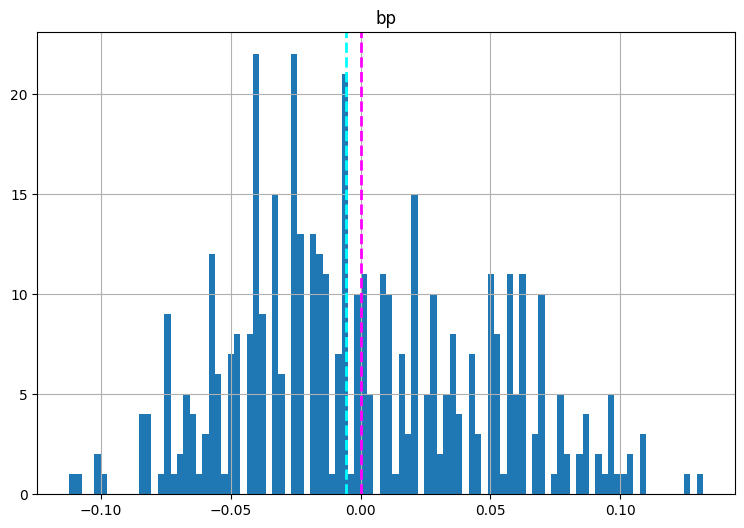

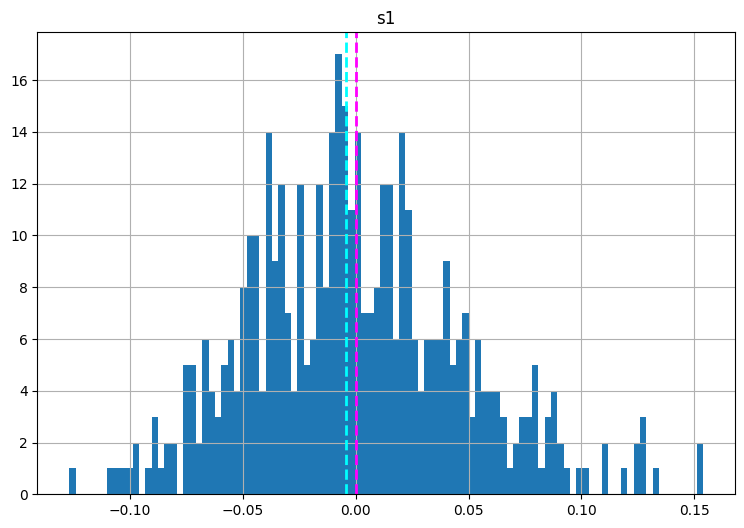

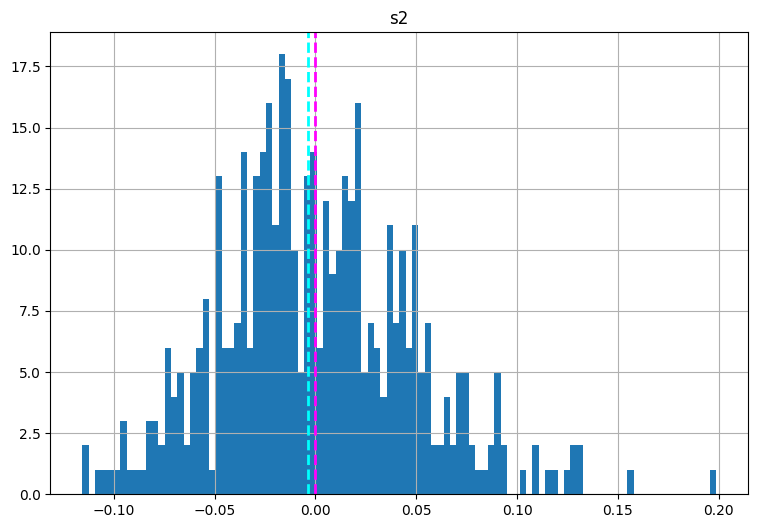

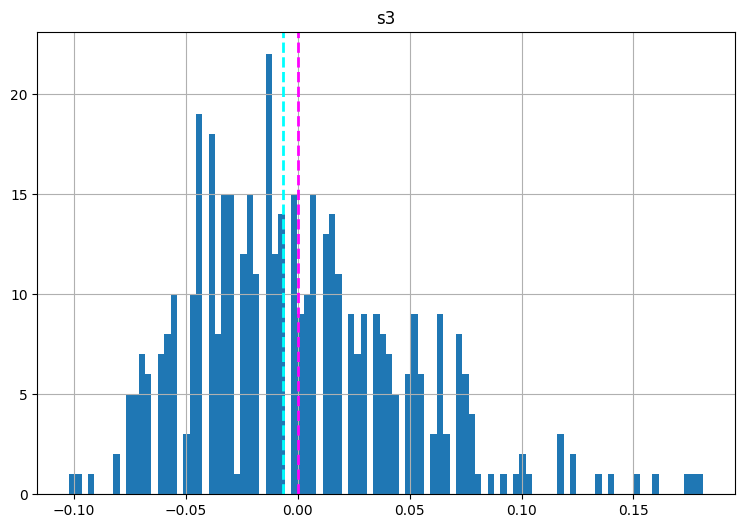

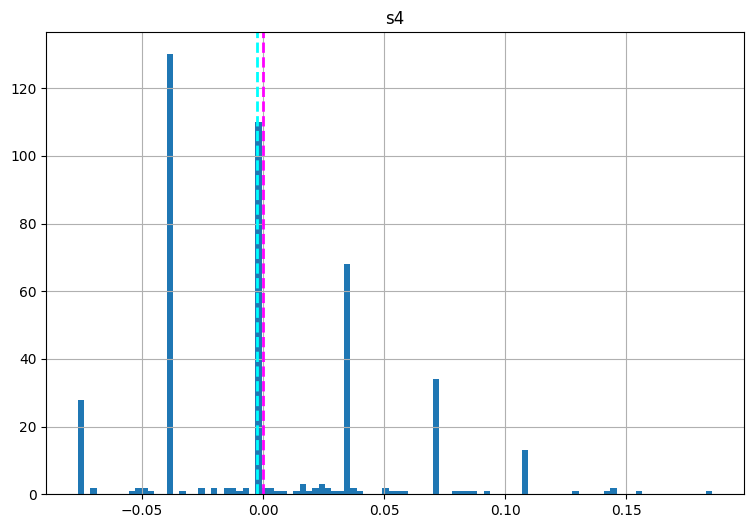

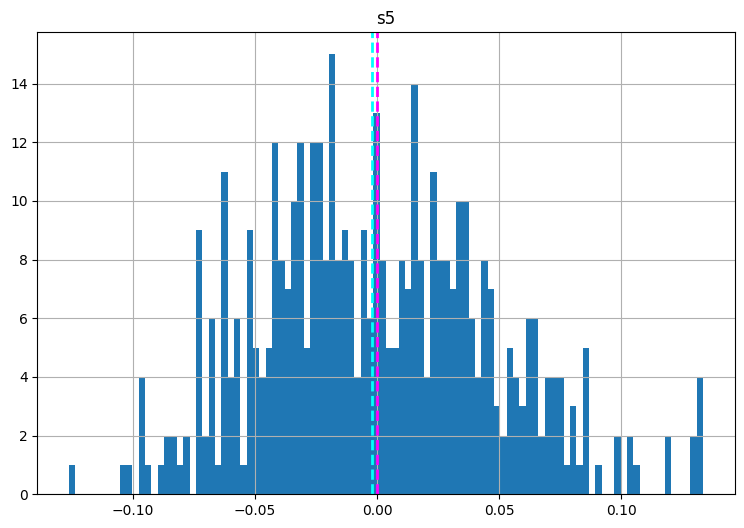

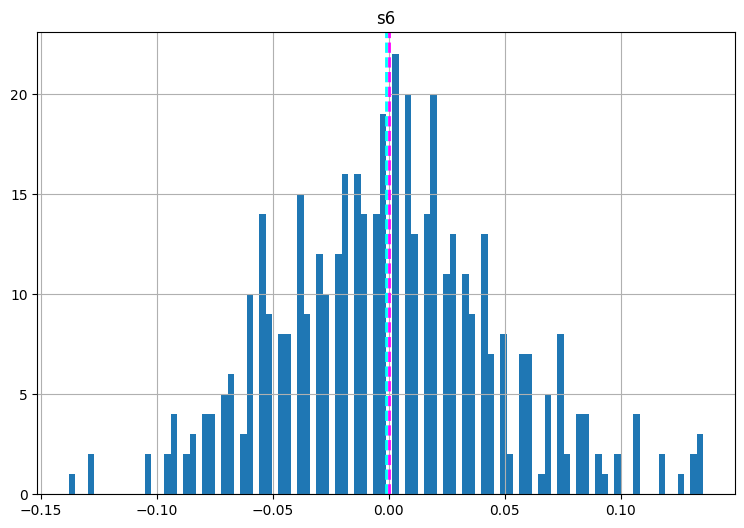

In [7]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Let's analyze the categorical feature(s)

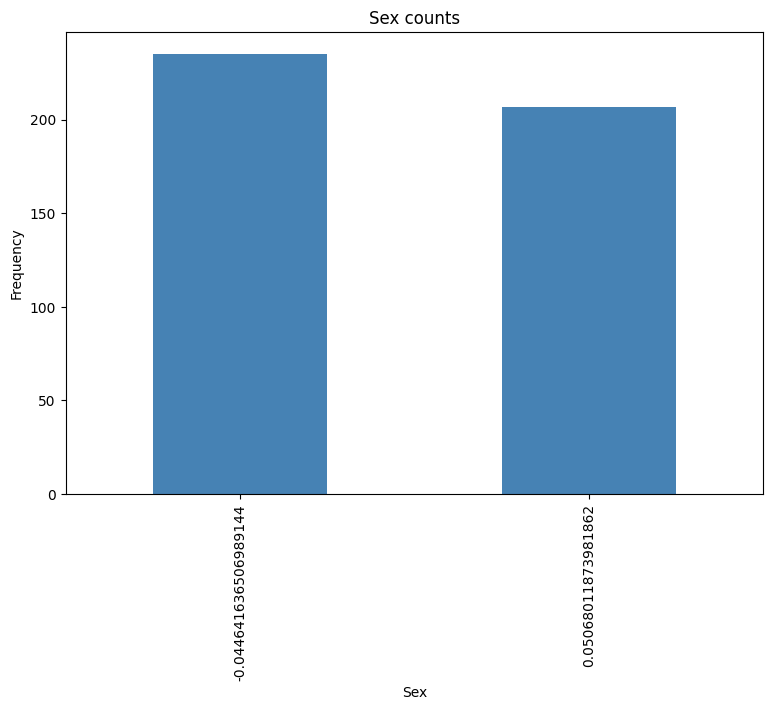

In [8]:
counts = df['sex'].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title('Sex counts')
ax.set_xlabel('Sex') 
ax.set_ylabel("Frequency")
plt.show()

One sex count is slightly higher than the other.
We can also analyze the relationship between the individual features and the labels. 
For the numeric values, scatter plot show the intersection of the features and the label values. The label here is the target which is the progression of diabetes.

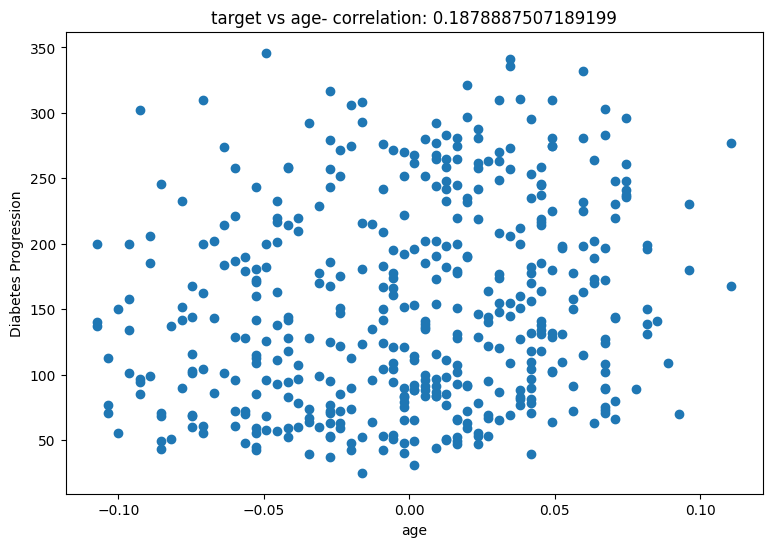

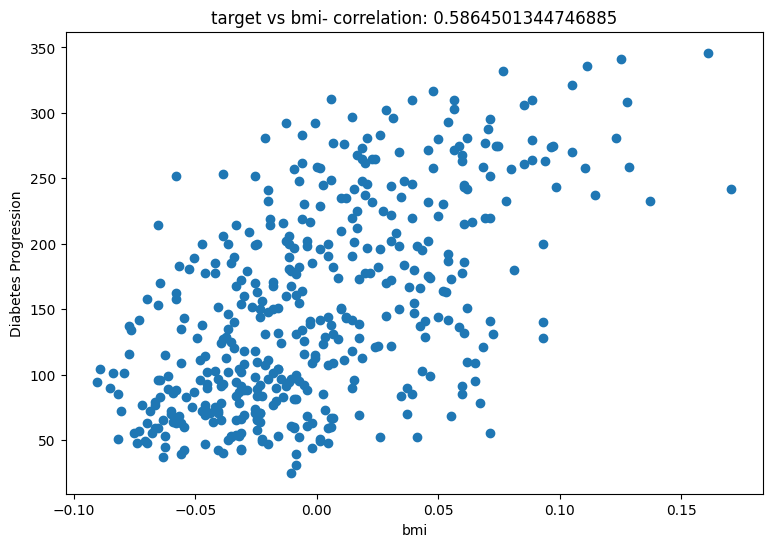

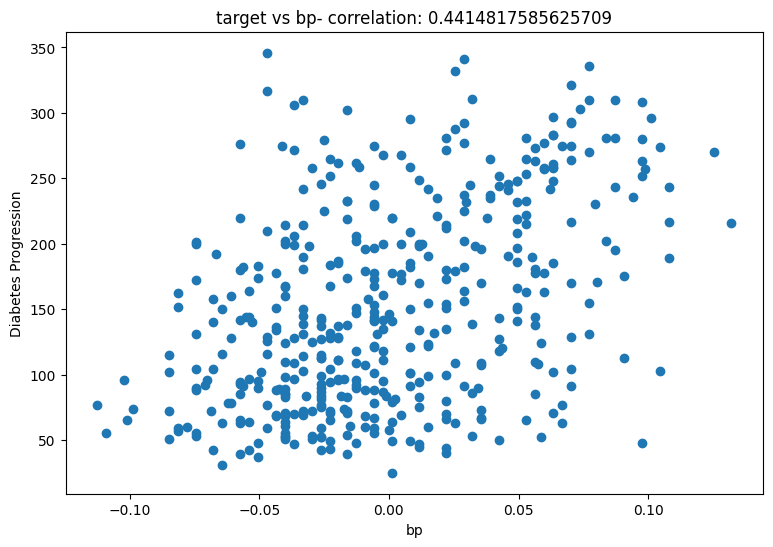

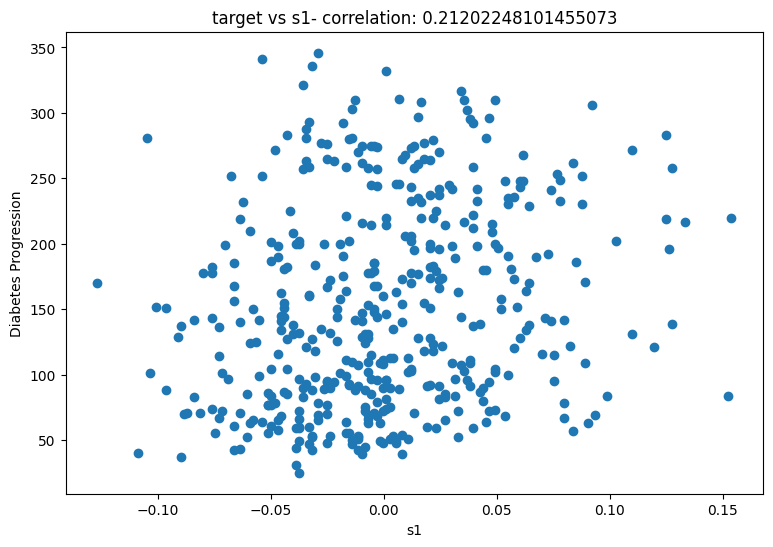

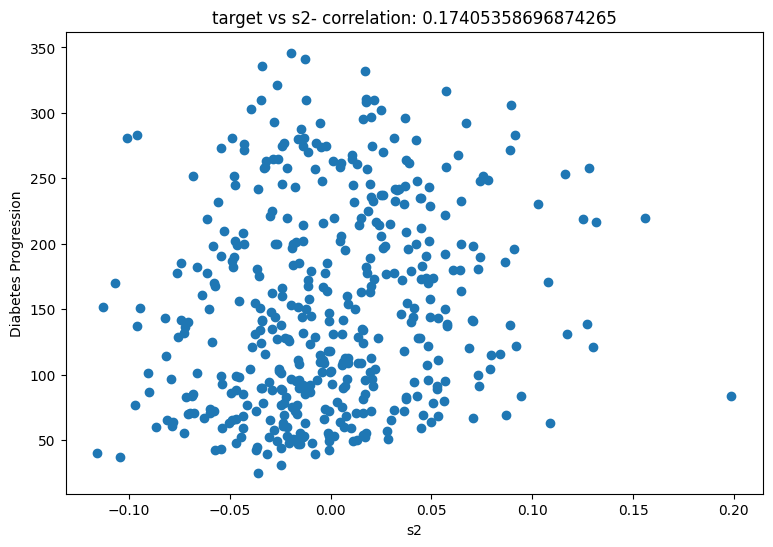

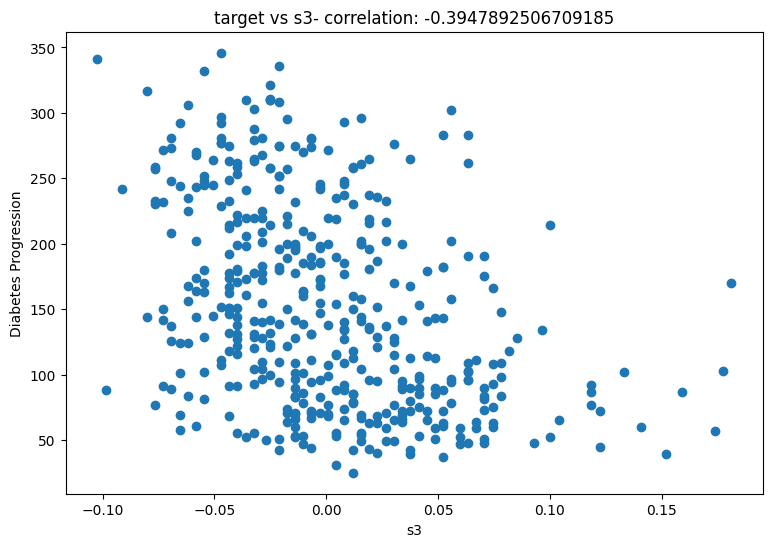

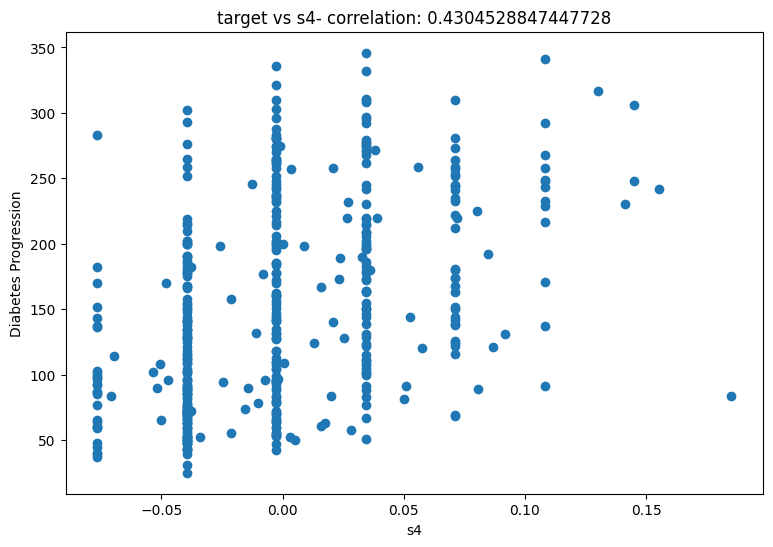

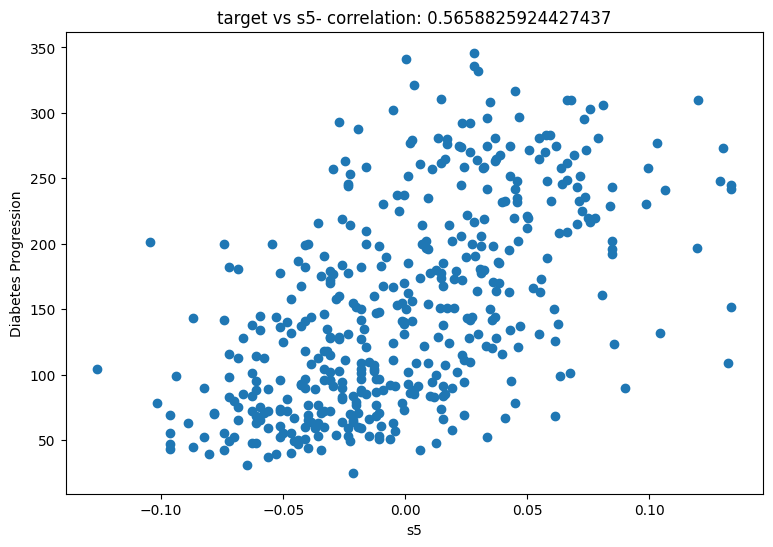

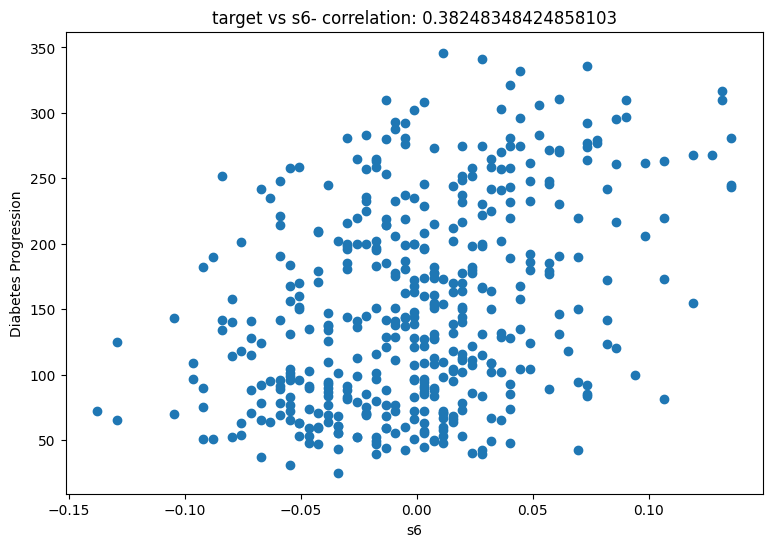

In [9]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['target']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Diabetes Progression')
    ax.set_title('target vs ' + col + '- correlation: ' + str(correlation))
plt.show()

I don't know if this is conclusive but I see that s5, bmi and bp show a slight diagonal trend. The high disease progression coincide with high bmi, s5 or bp.

Let's analyze the categorical feature, sex.

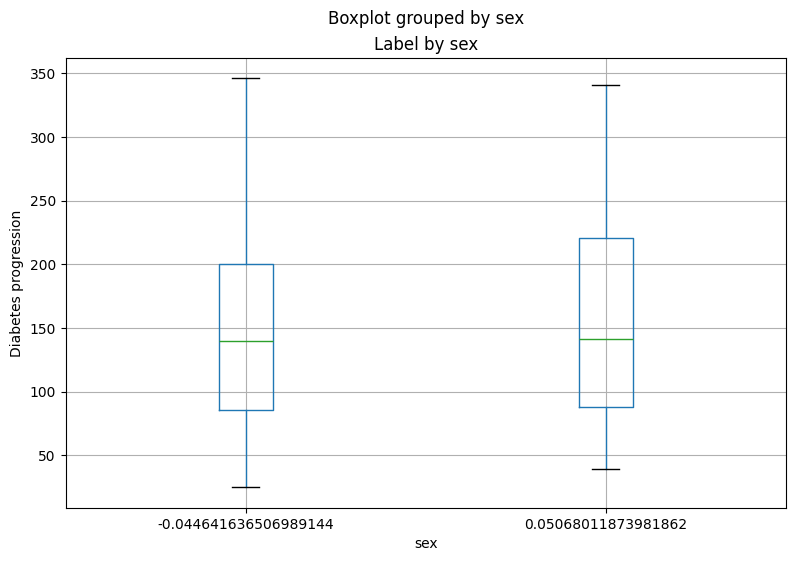

In [10]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'target', by = 'sex', ax = ax)
ax.set_title('Label by sex')
ax.set_ylabel("Diabetes progression")
plt.show()

## Tran a regression model

In [11]:
X,y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])
X = X[:, 2]
X = X.reshape((-1,1))

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [12]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 296 rows
Test Set: 146 rows


In [13]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
print('Predicted labels: ', np.round(y_pred)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [259. 214. 161. 128. 199. 251. 123. 175. 207. 200.]
Actual labels   :  [321. 215. 127.  64. 175. 275. 179. 232. 142.  99.]


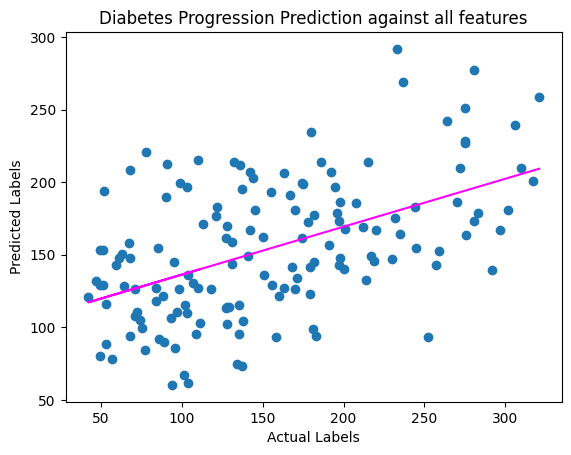

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Diabetes Progression Prediction against all features')
# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Calculating the
- **Mean Square Error (MSE)**
- **Root Mean Square Error (RMSE)**
- **Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>**)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 4004.3146281808617
RMSE: 63.2796541408126
R2: 0.23991852626296517
